<a target="_blank" href="https://colab.research.google.com/github/phitterio/phitter-kernel/blob/main/examples/fit_accelerate.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

# **TUTORIAL: ACCELERATE FIT PROCESS IN PHITTER**

In [10]:
import sys
import os

In [11]:
if os.getenv("COLAB_RELEASE_TAG"):
   !pip install phitter --quiet
else:
   sys.path.append("../../")

In [12]:
import phitter

**Generate random sample nakagami distribution. Sample Size: 1M**

In [13]:
distribution = phitter.continuous.Nakagami({"m": 11, "omega": 27})
data = distribution.sample(1000000)

**Accelerate the fit process**

**_Strategy 1_**: Specify a sample size smaller than the original dataset. A sample size of less than 100K is suggested. Phitter will randomly select a subsample of the specified size.

**_Strategy 2_**: Specify an estimation sample size smaller than the original dataset. A sample size of less than 10K is suggested. Phitter will randomly select a subsample of the specified size for parameter estimation.

> Note: You can use either one of the above strategies or both.

In [14]:
phi = phitter.Phitter(
    data=data,
    subsample_size=10000,
    subsample_estimation_size=10000,
)
phi.fit(n_workers=4)

**Summarize**

In [ ]:
phi.summarize()

,distribution,sse,parameters,chi_square,kolmogorov_smirnov,anderson_darling
0,generalized_gamma_4p,0.002553,"a: 1.168, d: 56.18, p: 1.806, loc: -2.665",✅,✅,✅
1,johnson_sb,0.002571,"xi: -7.658, lambda: 46.4, gamma: 11.53, delta:...",✅,✅,✅
2,beta,0.002582,"alpha: 286.9, beta: 1.513e+04, A: -8.131, B: 7...",✅,✅,✅
3,gamma_3p,0.002586,"alpha: 312.9, loc: -8.592, beta: 0.04388",✅,✅,✅
4,inverse_gaussian_3p,0.002591,"mu: 20.6, lambda: 1.451e+04, loc: -15.46",✅,✅,✅
5,fatigue_life,0.002592,"gamma: 0.03762, loc: -15.49, scale: 20.62",✅,✅,✅
6,erlang_3p,0.002611,"k: 313, beta: 0.04388, loc: -8.592",✅,✅,✅
7,nakagami,0.002620,"m: 11.16, omega: 27.04",✅,✅,✅
8,non_central_t_student,0.002659,"lambda: 9.964, n: 246.8, loc: -1.905, scale: 0...",✅,✅,✅
9,johnson_su,0.002710,"xi: -2, lambda: 11.47, gamma: -10.24, delta: 1...",✅,✅,✅


**Get top 10 distrbutions**

In [58]:
phi.df_sorted_distributions_sse.head()

distribution passed       sse  \
                                          
0             nakagami      ✅  0.002008   
1                 beta      ✅  0.002009   
2             gamma_3p      ✅  0.002009   
3  inverse_gaussian_3p      ✅  0.002010   
4         fatigue_life      ✅  0.002011   

                                      parameters     chi_square  \
                                                 test_statistic   
0                         m: 11.24, omega: 27.15      32.801636   
1  alpha: 163.8, beta: 3837, A: -4.951, B: 241.8      30.681951   
2       alpha: 186.6, loc: -5.404, beta: 0.05659      30.622217   
3           mu: 15.84, lambda: 6647, loc: -10.68      30.483833   
4       gamma: 0.0488, loc: -10.68, scale: 15.82      30.496600   

                                    kolmogorov_smirnov                 \
  critical_value   p_value rejected     test_statistic critical_value   
0      37.652484  0.136102    False           0.004812       0.013564   
1      35.172462  0.130809    False           0.004890       0.013564   
2      36.415029  0.164977    False           0.004924       0.013564   
3      36.415029  0.169229    False           0.005004       0.013564   
4      36.415029  0.168834    False           0.005016       0.013564   

                     anderson_darling                                    
    p_value rejected   test_statistic critical_value   p_value rejected  
0  0.973867    False         0.256252       2.492253  0.966994    False  
1  0.969583    False         0.222201       2.492253  0.983114    False  
2  0.967637    False         0.221124       2.492253  0.983526    False  
3  0.962604    False         0.218756       2.492253  0.984412    False  
4  0.961833    False         0.218614       2.492253  0.984464    False

**Plot a histogram of the dataset values to visualize the distribution**

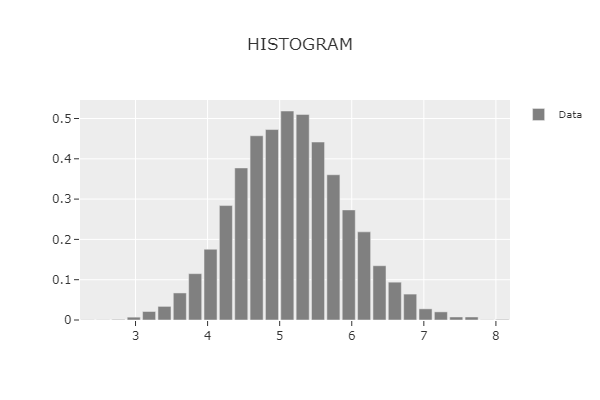

In [59]:
phi.plot_histogram()

**Plot histogram and compare with N distributions**

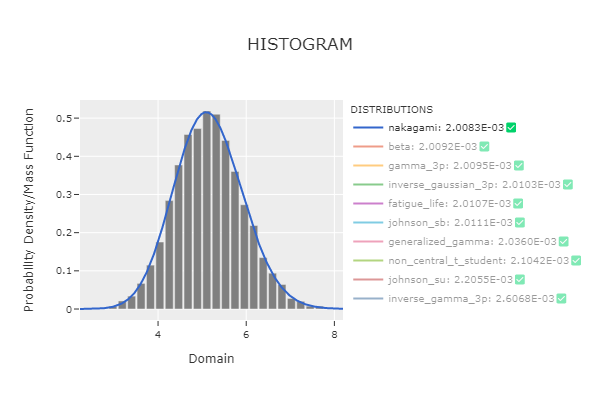

In [60]:
phi.plot_histogram_distributions()

**Plot the histogram along with the `id_distribution` distribution curve for comparison**

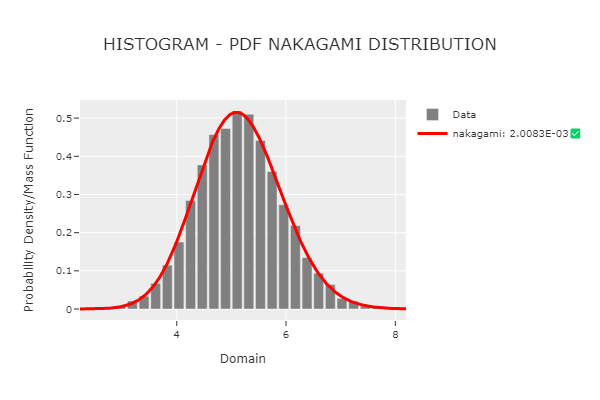

In [61]:
phi.plot_distribution("nakagami")

**Generate an empirical cumulative distribution function (ECDF) plot for the data**

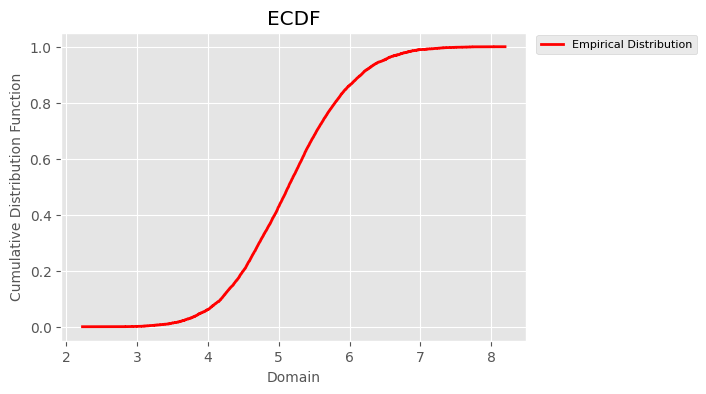

In [62]:
phi.plot_ecdf()

**Plot the ECDF to visualize how closely the dataset values follow a `id_distribution`**

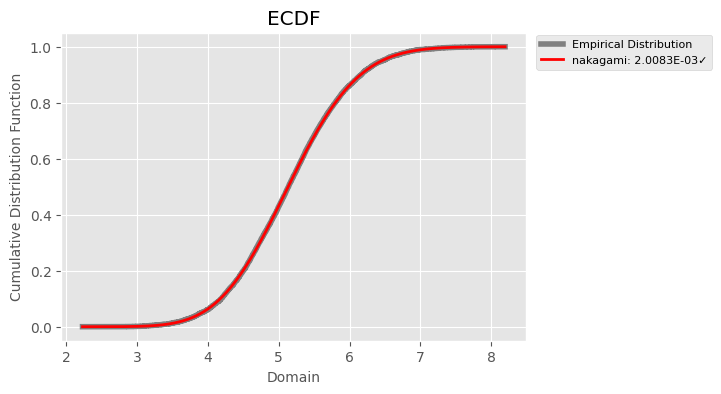

In [63]:
phi.plot_ecdf_distribution("nakagami")

**Create a QQ plot for the `id_distribution` to check the quantiles against a `id_distribution`**

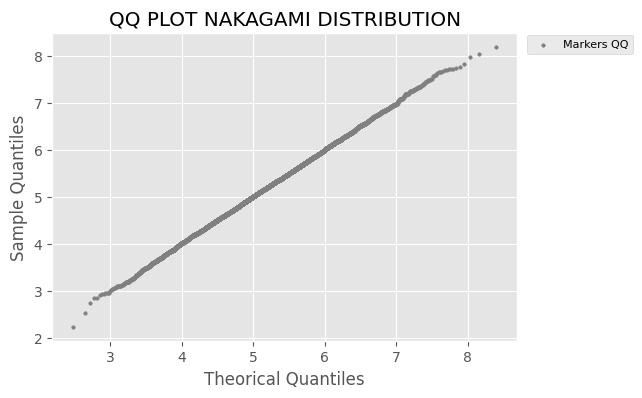

In [64]:
phi.qq_plot("nakagami")

**Generate a QQ plot with a regression line for the `id_distribution` to assess normality through quantile comparisons**

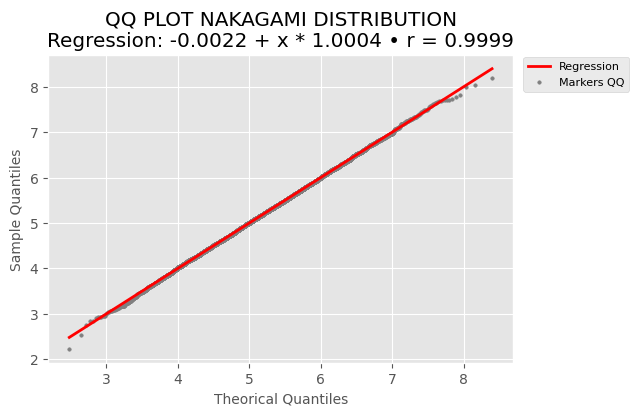

In [65]:
phi.qq_plot_regression("nakagami")